In [30]:
import numpy as np
from misc import *
from tqdm import tqdm
import matplotlib.pyplot as plt 


Plot trajectories + measurement signal

In [39]:
trajsx = {}
trajss = {}

periods = 40
ppp = 500

for itraj in range(9):
    means, covs, signals, [A, dt, C, D] = load_data(get_def_path()+"{}periods/{}ppp/".format(periods,ppp),itraj=itraj)
    trajsx[itraj] = means[:,0]
    trajss[itraj] = signals[:,0]

In [63]:
dt

0.002

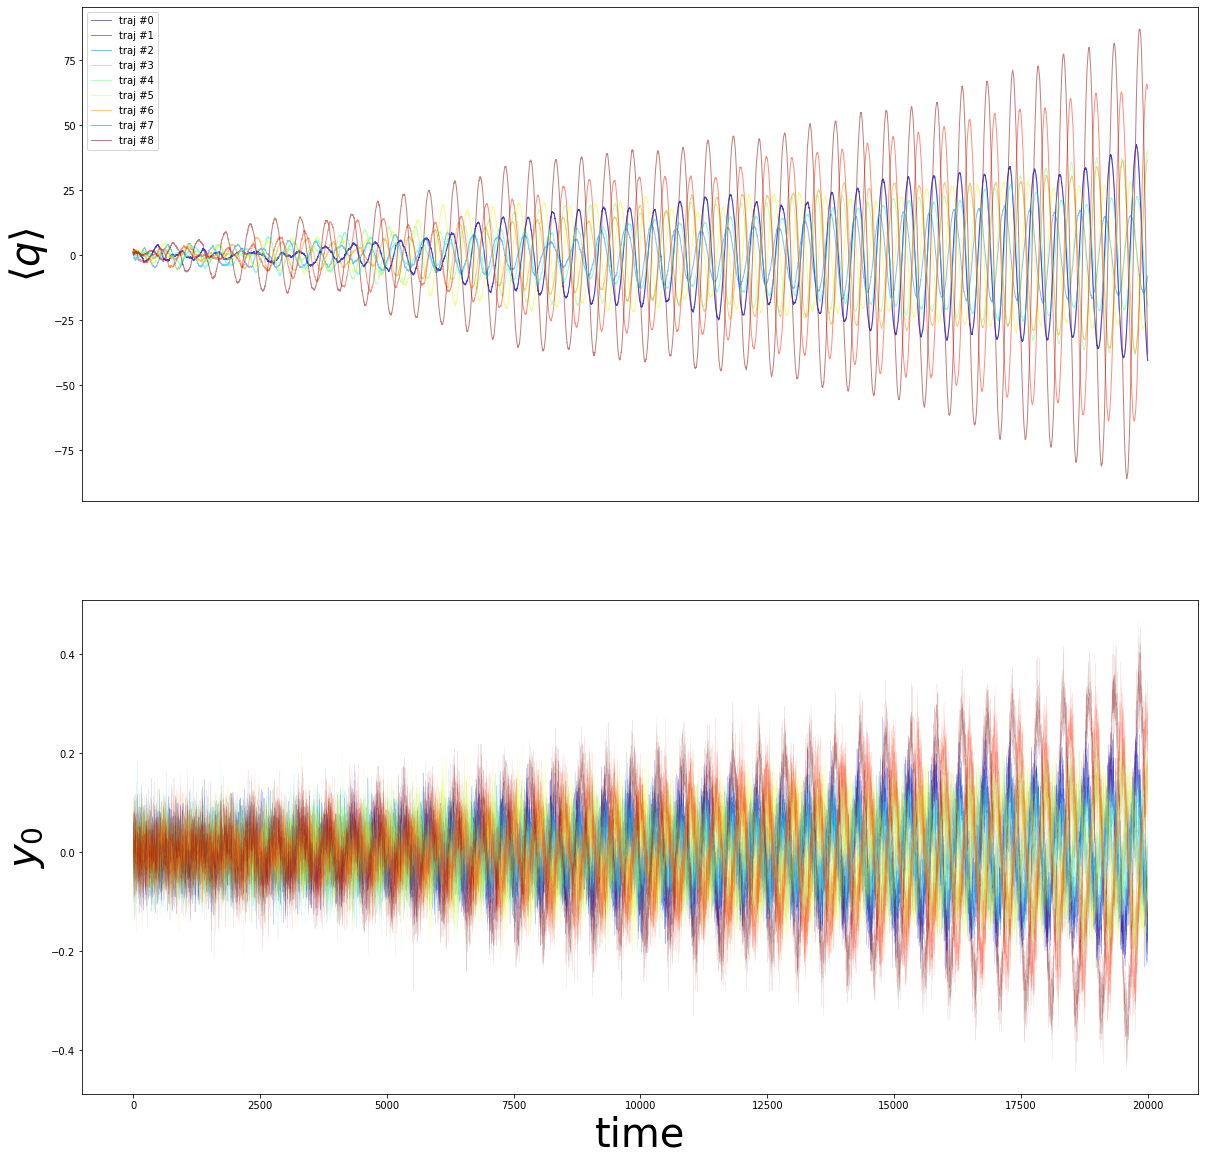

In [65]:
plt.figure(figsize=(20,20))

colors = plt.get_cmap("jet")
ax = plt.subplot2grid((2,1),(0,0))
ax1 = plt.subplot2grid((2,1),(1,0))
ax.set_xticks([])
measurements = np.arange(ppp*40+1)
for ind,i in enumerate(list(trajsx.keys())):
    ax.plot(measurements,trajsx[i],linewidth=1, alpha=0.5,color=colors(np.linspace(0,1,len(trajsx)))[ind], label="traj #{}".format(i))
    ax1.plot(measurements[:-1],trajss[i],linewidth=0.1, alpha=0.5,color=colors(np.linspace(0,1,len(trajsx)))[ind], label="traj #{}".format(i))

ax.set_ylabel(r'$\langle q \rangle$',size=40)
ax1.set_ylabel(r'$y_0$',size=40)

ax.legend(prop={"size":10}, loc='upper left')

plt.xlabel("time",size=40)
plt.savefig(get_def_path()+"figures/trajs.pdf")

Plot loss landscape

In [18]:
path = get_def_path()
loss, preds = {}, {}
parameters = np.arange(0,4*np.pi,np.pi/100)
for periods in tqdm(list(range(1,41,4)) + list(range(44,84,4))):

    path = get_def_path() + "visualize_tf/{}periods/{}ppp".format(periods,ppp)
    itraj="numpy"
    losses = []
    for l in range(len(parameters)):
        losses.append(np.load(path+"loss_{}.npy".format(l)))
    loss[periods] = losses

 90%|█████████ | 18/20 [01:33<00:10,  5.21s/it]


FileNotFoundError: [Errno 2] No such file or directory: '/data/uab-giq/scratch/matias/quantera/trajectories/visualize_tf/76periods/500ppploss_0.npy'

In [25]:
import os
landsape_path = get_def_path()+"figures/landscape_numpy/"
os.makedirs(landsape_path,exist_ok=True)
np.save(landsape_path+"losses",np.array(list(loss.values())))

In [28]:
llandscape = np.load(get_def_path()+"figures/landscape_numpy/losses.npy")
landscape={p:llandscape[i] for p,i in zip(range(1,76,4), range(len(llandscape)))}

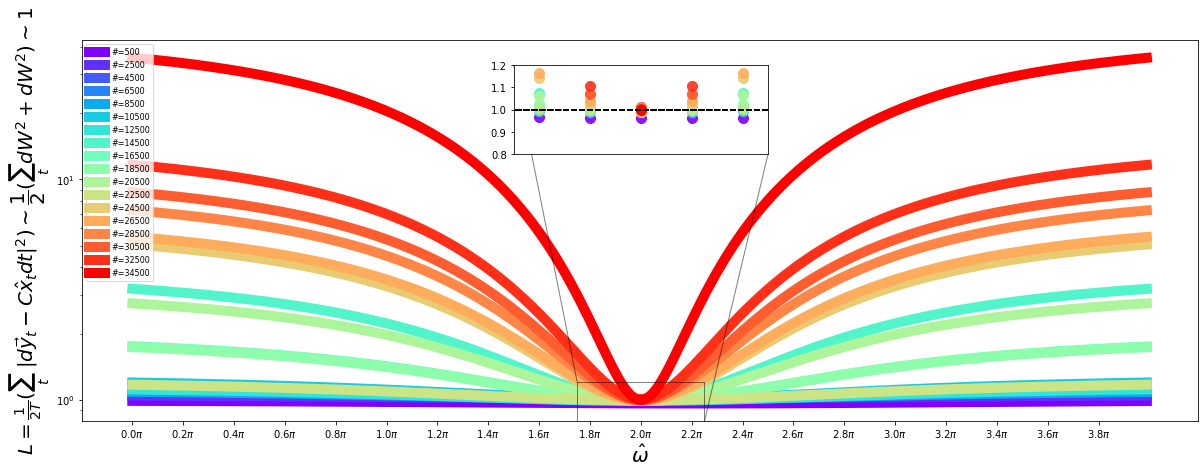

In [69]:
plt.figure(figsize=(20,7))

colors = plt.get_cmap("rainbow")
ax = plt.subplot2grid((1,1),(0,0))
axins = ax.inset_axes([2*np.pi - np.pi/2, 13, np.pi, 20],  transform=ax.transData)
axins.set_xticks([])

for ind,i in enumerate(list(landscape.keys())):
    ax.plot(parameters,landscape[i],'.-', linewidth=10, alpha=1,color=colors(np.linspace(0,1,len(landscape)))[ind], label="#={}".format(i*500))
    ax.set_xticks(ticks=parameters[0:-1:20])
    ax.set_xticklabels([str(np.round(p/np.pi,1))+r'$\pi$' for p in parameters[0:-1:20]])
    ax.set_yscale('log')
    axins.scatter(parameters[0:-1:10],landscape[i][0:-1:10],s=100, alpha=.9,color=colors(np.linspace(0,1,len(landscape)))[ind])
    axins.plot(parameters[0:-1:10],np.ones(len(landscape[i][0:-1:10])),'--',color="black")
    
    axins.set_xlim([2*np.pi - np.pi/4, 2*np.pi + np.pi/4])
    axins.set_ylim([.8,1.2])
    
plt.legend(prop={"size":8}, loc='upper left')
ax.indicate_inset_zoom(axins, edgecolor="black")

plt.xlabel(r'$\hat{\omega}$',size=20)
plt.ylabel(r'$L = \frac{1}{2 T}(\sum_t \; |d\vec{y}_t - C\hat{x}_t dt|^2) \sim \dfrac{1}{2} (\sum_t dW^2 + dW^2) \sim 1$', size=20)
plt.savefig(get_def_path()+"figures/landscape_numpy.pdf")
plt.savefig("landscape_numpy.pdf")